In [157]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import random

# '''
When you run the script it will generate three guassian distributed clusters as well as some outliers. It then attmepts to cluster the 
data and plot the results.

This code may be needed to run a few times as it is not finished. There should be three cluster centers and if the algorithm picks out more or less than 
three cluster centers. In each section there are what needs to be worked on to improve the code.
'''

In [158]:
# inputs 
dc = 0.9 # changing dc changes the value of the density (p) array
p_thresh = 20.0 # changing the p and delta thresholds changes what is considered a cluster center
delta_thresh = 6.0

(-5.9070341445776986,
 14.047717036131672,
 -11.563960623939243,
 9.0639616387364299)

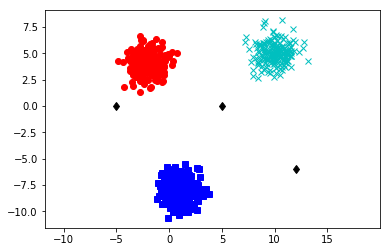

In [159]:
# this is how the data is now created


#### things to change (import data as text files) ####

# create cluster 1
mean1 = [10, 5]
cov1 = [[1, 0], [0, 1]]
x1, y1 = np.random.multivariate_normal(mean1, cov1, 200).T

# create cluster 2
mean2 = [-2, 4]
cov2 = [[1, 0], [0, 1]]
x2, y2 = np.random.multivariate_normal(mean2, cov2, 200).T

# create cluster 3
mean3 = [1, -8]
cov3 = [[1, 0], [0, 1]]
x3, y3 = np.random.multivariate_normal(mean3, cov3, 200).T

# add outliers 
outliers = [[5,0],[12,-6],[-5,0]]
x_out = []; y_out = []
for idx in range(0,np.shape(outliers)[0]):
    x_out.append(outliers[idx][0])
    y_out.append(outliers[idx][1])
x_out = np.array(x_out)
y_out = np.array(y_out)

# plot the data
# plots for the three clusters individually (needs to be generalized to arbitrary number of clusters)
plt.plot(x1, y1, 'x',c='c')
plt.plot(x2, y2, 'o',c='r')
plt.plot(x3, y3, 's',c='b')
plt.plot(x_out, y_out, 'd',c='k')
plt.axis('equal')

In [160]:
# here we reorder the data so to make it possibly more realistic (this shouldn't matter though)

# stack the cluster arrays together
x_tot = np.hstack([x1,x2,x3,x_out])
y_tot = np.hstack([y1,y2,y3,y_out])

# shuffle the data around
combined = zip(x_tot, y_tot)
random.shuffle(combined)
x_tot[:], y_tot[:] = zip(*combined)

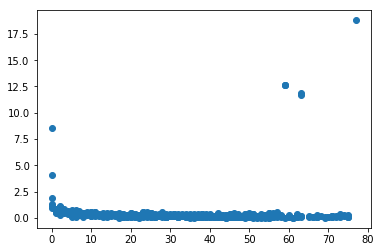

In [161]:
# create the density (p) and the delta arrays

#### things to change (generalize to n-dimensional data, clean up the code, fix np.min(distances_temp) error by using try) ####

# create the p array
p = np.zeros(np.shape(y_tot)[0])
distances = []
for idx in range(0,np.shape(y_tot)[0]):
    x_temp = (x_tot[idx]-x_tot)**2
    y_temp = (y_tot[idx]-y_tot)**2
    # get rid of counting the same point
    x_temp = np.delete(x_temp,idx); y_temp = np.delete(y_temp,idx)
    distance = np.sqrt(x_temp+y_temp)
    distances.append(distance)
    # only count points that are closer than dc
    close = distance - dc
    close_sum = np.sum(close<0)
    p[idx] = close_sum
distances = np.array(distances)

# create the delta array
maxarg = np.argmax(p)
delta = np.zeros(np.shape(y_tot)[0])
for idx in range(0,np.shape(y_tot)[0]):
    if idx != maxarg:
        p_loop = p[idx]
        p_temp = np.delete(p,idx)
        distances_temp =  distances[idx,np.where(p_temp>p_loop)]
        try:
            delta[idx] = np.min(distances_temp)
        except:
            print 'index %.i seems to be a max'%idx
    else:
        delta[idx] = np.max(distances[idx,:])

# plots the p vs delta graph
plt.scatter(p,delta)

[123 136 317 322 570 590]
[ 59.  59.  59.  63.  77.  63.]
[ 12.62696004  12.62031412  12.60674104  11.67308019  18.78432505
  11.85071982]
0 1
0 2
1 0
1 2
2 0
2 1
3 5
5 3
number of cluster centers is 3


(-5.9070341445776986,
 14.047717036131672,
 -11.563960623939243,
 9.0639616387364299)

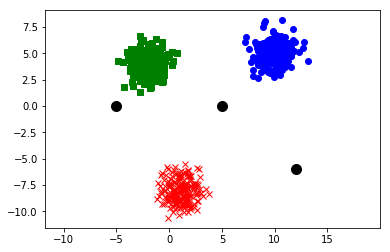

In [162]:
# find the cluster centers and asign each point to a cluster

#### things to change (generalize to n-dimension), there is a thershold distance for p and delta to remove duplicates

#find the cluster center
inds_center = np.squeeze(np.where((p>p_thresh) & (delta>delta_thresh)))
### get rid of points that are too close
print inds_center
print p[inds_center]
print delta[inds_center]
for idx1 in range(0,len(inds_center)):
    for idx2 in range(0,len(inds_center)):
        if idx1 == idx2:
            pass
        else:
            if abs(p[inds_center[idx1]]-p[inds_center[idx2]]) <= 0 and abs(delta[inds_center[idx1]]-delta[inds_center[idx2]]) <= 0.5:
                print idx1, idx2
                inds_center[idx1] = inds_center[idx2]
            else:
                pass
inds_center = np.unique(inds_center)
        
    
print 'number of cluster centers is %.i'%np.shape(inds_center)[0]

# assign each point to a cluster
distances2 = []
for idx in inds_center:
    x_temp2 = (x_tot[idx]-x_tot)**2
    y_temp2 = (y_tot[idx]-y_tot)**2
    distance2 = np.sqrt(x_temp2+y_temp2)
    distances2.append(distance2)
distances2 = np.array(distances2)
# find the outliers
dc2 = dc
inds3 = np.where(np.min(distances,axis=1)>dc2*2)
# cluster assignment 
inds2 = np.argmin(distances2,axis=0)

# plot the data
plt_params = [('x','r'),('o','b'),('s','g'),('d','c'),('p','m'),('*','k'),('^','y'),('8','orange')]
for idx in range(0,np.shape(inds_center)[0]):
    plt.plot(x_tot[inds2==idx], y_tot[inds2==idx], plt_params[idx][0],c=plt_params[idx][1])
plt.plot(x_tot[inds3],y_tot[inds3],'o',c='k',ms=10)
plt.axis('equal')